<a href="https://colab.research.google.com/github/kdwang1808/2020-MCM/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
··········


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive
import os
import sys
os.chdir('drive/Colab Notebooks/2020MCM_PC')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tqdm as tqdm
import matplotlib.pyplot as plt
%matplotlib inline
! pip install plotly
import chart_studio.plotly as ply
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
! pip install pyramid-arima
from pyramid.arima import auto_arima

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision 

In [0]:
hair_11 = pd.read_csv("for_mcm/hair/11.csv")

In [13]:
hair_11.head(8)

,Unnamed: 0,time,cnt,ave_score,useful_vote
0,0,2008/1,0,0.0,0.0
1,1,2008/2,0,0.0,0.0
2,2,2008/3,1,5.0,1.0
3,3,2008/4,0,0.0,0.0
4,4,2008/5,0,0.0,0.0
5,5,2008/6,1,4.0,1.0
6,6,2008/7,0,0.0,0.0
7,7,2008/8,2,5.0,0.5


In [27]:
hair_11.index = pd.to_datetime(hair_11["time"])
hair_11 = hair_11.drop(['Unnamed: 0'], axis=1)

KeyError: ignored

In [61]:
hair_11.tail(8)

,time,cnt,ave_score,useful_vote
time,,,,
2015-01-01,2015/1,20,3.950000,0.300000
2015-02-01,2015/2,18,4.388889,0.166667
2015-03-01,2015/3,13,4.384615,0.000000
2015-04-01,2015/4,9,4.111111,0.111111
2015-05-01,2015/5,12,4.666667,0.000000
2015-06-01,2015/6,19,4.789474,0.315789
2015-07-01,2015/7,17,3.764706,0.058824
2015-08-01,2015/8,14,3.714286,0.071429


<BarContainer object of 92 artists>

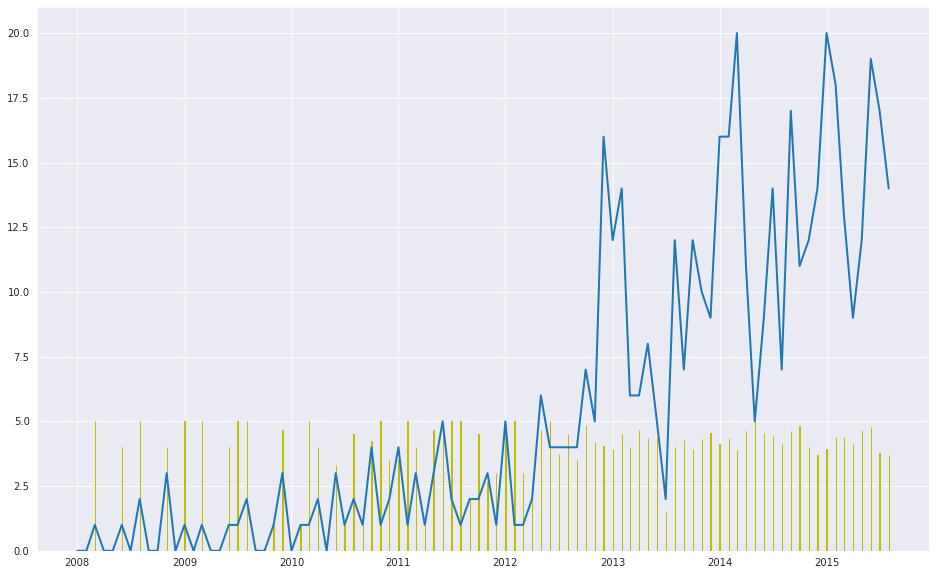

In [45]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,10))
plt.plot(hair_11.index, hair_11['cnt'], lw=2)
plt.bar(hair_11.index, hair_11['ave_score'], edgecolor='y')

In [46]:
from chart_studio.plotly import plot_mpl
result = seasonal_decompose(hair_11['cnt']+1, model = 'multiplicative')
plot_mpl(result.plot())

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.



PlotlyRequestError: ignored

In [93]:
from pyramid.arima import auto_arima
model = auto_arima(hair_11['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
print(model.aic)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=424.165, BIC=436.012, Fit time=1.778 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=496.000, BIC=500.739, Fit time=0.019 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=452.557, BIC=462.035, Fit time=0.277 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=423.253, BIC=432.731, Fit time=1.213 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=425.231, BIC=437.079, Fit time=1.421 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=447.216, BIC=454.324, Fit time=0.349 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=425.216, BIC=437.063, Fit time=3.097 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=426.450, BIC=440.666, Fit time=3.495 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=458.437, BIC=465.545, Fit time=0.639 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=424.314, BIC=436.161, Fit time=1.685 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=427.248, BIC=441.464, Fit time=1.168 seconds
Total fit time: 15.146 seconds
<function ARIMA.aic at 0x7ff3d6aa31e0>


In [0]:
forecast_11 = model.predict(n_periods=24)
forecast_11 = pd.DataFrame(forecast_11,columns=['Prediction'])
forecast_11.index = pd.date_range('2015-08', '2017-08', freq='M')

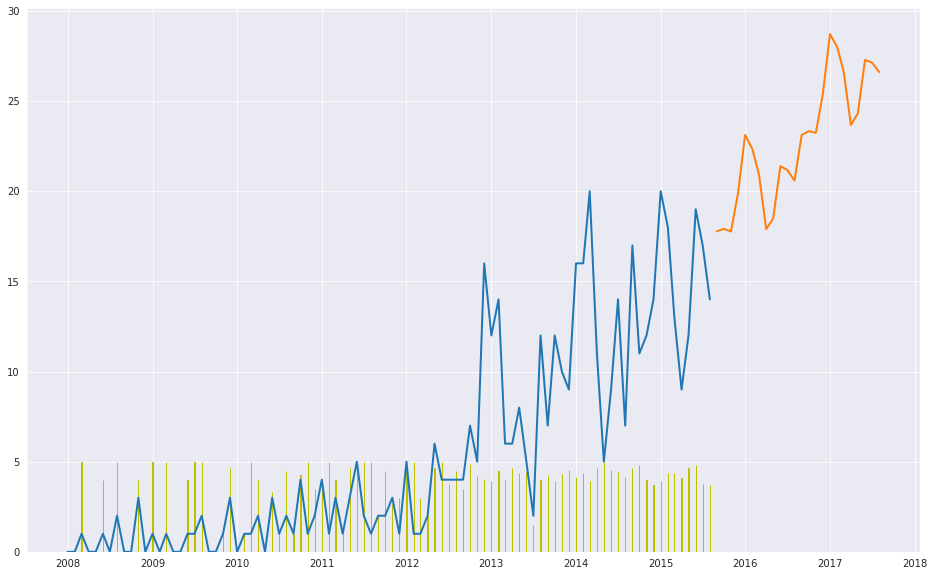

In [94]:
plt.figure(figsize=(16,10))
plt.plot(hair_11.index, hair_11['cnt'], lw=2)
plt.bar(hair_11.index, hair_11['ave_score'], edgecolor='y')
plt.plot(forecast_11.index, forecast_11['Prediction'], lw=2, linestyle='-')

In [95]:
hair_88 = pd.read_csv("for_mcm/hair/88.csv")
hair_88.index = pd.to_datetime(hair_88["time"])
model = auto_arima(hair_88['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_88 = model.predict(n_periods=24)
forecast_88 = pd.DataFrame(forecast_88,columns=['Prediction'])
forecast_88[forecast_88["Prediction"]<0] = 0
forecast_88.index = pd.date_range('2015-08', '2017-08', freq='M')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=419.888, BIC=431.735, Fit time=1.362 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=445.756, BIC=450.495, Fit time=0.021 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=431.109, BIC=440.587, Fit time=0.283 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=418.033, BIC=427.511, Fit time=0.831 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=420.001, BIC=431.849, Fit time=0.769 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=440.227, BIC=447.335, Fit time=0.080 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=419.984, BIC=431.832, Fit time=1.290 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=421.579, BIC=435.795, Fit time=3.582 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=422.036, BIC=429.144, Fit time=0.711 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=419.785, BIC=431.632, Fit time=1.106 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=421.657, BIC=435.873, Fit time=2.159 seconds
Total fit time: 12.201 seconds


In [96]:
hair_244 = pd.read_csv("for_mcm/hair/244.csv")
hair_244.index = pd.to_datetime(hair_244["time"])
model = auto_arima(hair_244['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_244 = model.predict(n_periods=24)
forecast_244 = pd.DataFrame(forecast_244,columns=['Prediction'])
forecast_244[forecast_244["Prediction"]<0] = 0
forecast_244.index = pd.date_range('2015-08', '2017-08', freq='M')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=433.868, BIC=445.716, Fit time=0.398 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=469.744, BIC=474.483, Fit time=0.019 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=436.762, BIC=446.239, Fit time=0.298 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=435.246, BIC=444.724, Fit time=0.362 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=434.913, BIC=449.130, Fit time=0.613 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=441.200, BIC=450.677, Fit time=0.097 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=434.377, BIC=448.593, Fit time=1.156 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=436.074, BIC=452.660, Fit time=2.012 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=427.352, BIC=441.569, Fit time=1.152 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=433.779, BIC=445.627, Fit time=0.330 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=436.890, BIC=453.476, Fit time=1.301 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=433.736, BIC=443.214, Fit time=0.273 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=431.296, BIC=450.252, Fit time=2.295 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=428.641, BIC=445.227, Fit time=2.829 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=433.754, BIC=445.601, Fit time=0.661 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=428.318, BIC=444.904, Fit time=3.224 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=430.157, BIC=449.113, Fit time=4.545 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=437.766, BIC=454.353, Fit time=1.052 seconds
Total fit time: 22.627 seconds


In [97]:
hair_258 = pd.read_csv("for_mcm/hair/258.csv")
hair_258.index = pd.to_datetime(hair_258["time"])
model = auto_arima(hair_258['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_258 = model.predict(n_periods=24)
forecast_258 = pd.DataFrame(forecast_258,columns=['Prediction'])
forecast_258[forecast_258["Prediction"]<0] = 0
forecast_258.index = pd.date_range('2015-08', '2017-08', freq='M')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=451.448, BIC=463.295, Fit time=0.542 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=493.890, BIC=498.629, Fit time=0.019 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=461.089, BIC=470.566, Fit time=0.314 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=449.522, BIC=459.000, Fit time=0.392 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=448.908, BIC=460.755, Fit time=0.518 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=450.845, BIC=460.323, Fit time=0.248 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=450.803, BIC=465.019, Fit time=3.010 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=473.757, BIC=480.865, Fit time=0.087 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=452.766, BIC=469.352, Fit time=3.320 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=450.868, BIC=465.085, Fit time=0.598 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=472.220, BIC=481.698, Fit time=0.326 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=450.852, BIC=465.069, Fit time=0.655 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=452.832, BIC=469.418, Fit time=1.006 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 1, 12); AIC=450.838, BIC=465.055, Fit time=1.517 seconds
Total fit time: 12.561 seconds


In [98]:
hair_269 = pd.read_csv("for_mcm/hair/269.csv")
hair_269.index = pd.to_datetime(hair_269["time"])
model = auto_arima(hair_269['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_269 = model.predict(n_periods=24)
forecast_269 = pd.DataFrame(forecast_269,columns=['Prediction'])
forecast_269[forecast_269["Prediction"]<0] = 0
forecast_269.index = pd.date_range('2015-08', '2017-08', freq='M')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=393.871, BIC=405.719, Fit time=1.513 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=431.435, BIC=436.174, Fit time=0.020 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=402.371, BIC=411.849, Fit time=0.296 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=398.014, BIC=407.492, Fit time=0.440 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=393.425, BIC=407.641, Fit time=1.905 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=395.613, BIC=407.461, Fit time=1.566 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=394.600, BIC=411.186, Fit time=4.740 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=423.552, BIC=433.030, Fit time=0.133 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=396.591, BIC=415.546, Fit time=4.746 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=397.525, BIC=409.372, Fit time=0.430 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=394.473, BIC=411.060, Fit time=2.380 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=401.645, BIC=413.492, Fit time=0.385 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=394.570, BIC=411.157, Fit time=2.066 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=408.222, BIC=417.700, Fit time=0.362 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=396.509, BIC=415.464, Fit time=2.352 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 1, 12); AIC=395.534, BIC=412.120, Fit time=4.153 seconds
Total fit time: 27.496 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [99]:
micro_0 = pd.read_csv("for_mcm/micro/0.csv")
micro_0.index = pd.to_datetime(micro_0["time"])
model = auto_arima(micro_0['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_0 = model.predict(n_periods=24)
forecast_0 = pd.DataFrame(forecast_0,columns=['Prediction'])
forecast_0[forecast_0["Prediction"]<0] = 0
forecast_0.index = pd.date_range('2015-08', '2017-08', freq='M')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=246.364, BIC=258.211, Fit time=0.653 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=303.118, BIC=307.857, Fit time=0.021 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=262.812, BIC=272.290, Fit time=0.425 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=244.529, BIC=254.007, Fit time=0.455 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=243.323, BIC=255.171, Fit time=0.747 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=241.580, BIC=251.057, Fit time=0.634 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 1, 12); AIC=245.278, BIC=259.494, Fit time=2.896 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=243.313, BIC=255.161, Fit time=0.647 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=279.897, BIC=287.005, Fit time=0.325 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 1, 0, 12); AIC=243.102, BIC=254.949, Fit time=0.804 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 0, 12); AIC=225.626, BIC=239.843, Fit time=2.051 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=263.795, BIC=275.642, Fit time=0.434 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 2) seasonal_order=(2, 1, 0, 12); AIC=227.363, BIC=243.949, Fit time=4.434 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=227.342, BIC=243.928, Fit time=2.566 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(1, 1, 2) seasonal_order=(2, 1, 1, 12); AIC=229.521, BIC=248.477, Fit time=5.256 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 0, 12); AIC=223.983, BIC=240.569, Fit time=2.299 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=243.722, BIC=257.939, Fit time=1.380 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(2, 1, 3) seasonal_order=(1, 1, 0, 12); AIC=226.381, BIC=245.336, Fit time=2.807 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(1, 1, 0, 12); AIC=213.350, BIC=234.675, Fit time=1.900 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 1, 0, 12); AIC=213.100, BIC=232.056, Fit time=0.543 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 1, 1, 12); AIC=213.485, BIC=234.810, Fit time=1.702 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(3, 1, 3) seasonal_order=(1, 1, 1, 12); AIC=215.325, BIC=239.019, Fit time=2.377 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 1, 0, 12); AIC=248.295, BIC=264.881, Fit time=0.658 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=211.746, BIC=228.332, Fit time=0.408 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=263.154, BIC=275.001, Fit time=0.224 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(1, 1, 0, 12); AIC=211.614, BIC=230.569, Fit time=1.813 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(3, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=213.609, BIC=234.934, Fit time=1.850 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(3, 1, 2) seasonal_order=(2, 1, 1, 12); AIC=215.611, BIC=239.305, Fit time=3.904 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=214.165, BIC=230.751, Fit time=1.531 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



Fit ARIMA: order=(3, 1, 2) seasonal_order=(2, 1, 0, 12); AIC=213.610, BIC=234.935, Fit time=3.005 seconds
Total fit time: 48.766 seconds


In [100]:
micro_13 = pd.read_csv("for_mcm/micro/13.csv")
micro_13.index = pd.to_datetime(micro_13["time"])
model = auto_arima(micro_13['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_13 = model.predict(n_periods=24)
forecast_13 = pd.DataFrame(forecast_13,columns=['Prediction'])
forecast_13 [forecast_13["Prediction"]<0] = 0
forecast_13.index = pd.date_range('2015-08', '2017-08', freq='M')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=361.660, BIC=373.507, Fit time=0.613 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=370.972, BIC=375.711, Fit time=0.019 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=361.539, BIC=371.017, Fit time=0.303 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=360.114, BIC=369.592, Fit time=0.319 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=362.097, BIC=373.944, Fit time=0.632 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=364.264, BIC=371.372, Fit time=0.070 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=362.103, BIC=373.950, Fit time=0.766 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=364.103, BIC=378.320, Fit time=0.829 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=360.832, BIC=367.941, Fit time=0.230 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=360.523, BIC=372.370, Fit time=0.513 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=356.788, BIC=371.005, Fit time=0.813 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=358.696, BIC=375.283, Fit time=1.316 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=360.495, BIC=372.342, Fit time=0.286 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 2, 12); AIC=358.735, BIC=375.321, Fit time=2.137 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 2, 12); AIC=360.783, BIC=379.739, Fit time=2.479 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=350.104, BIC=366.690, Fit time=1.088 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=355.185, BIC=369.402, Fit time=1.141 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 1, 1, 12); AIC=352.070, BIC=371.026, Fit time=2.180 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 1, 1, 12); AIC=353.626, BIC=374.952, Fit time=3.440 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=351.917, BIC=370.873, Fit time=2.104 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=349.667, BIC=363.883, Fit time=0.381 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=351.663, BIC=368.249, Fit time=0.535 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=356.534, BIC=368.381, Fit time=0.379 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 1, 0, 12); AIC=351.732, BIC=368.318, Fit time=1.209 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=366.249, BIC=375.727, Fit time=0.150 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 1, 0, 12); AIC=353.426, BIC=372.381, Fit time=0.958 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 0, 12); AIC=350.246, BIC=366.832, Fit time=1.153 seconds
Total fit time: 26.057 seconds


In [101]:
micro_19 = pd.read_csv("for_mcm/micro/19.csv")
micro_19.index = pd.to_datetime(micro_19["time"])
model = auto_arima(micro_19['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_19 = model.predict(n_periods=24)
forecast_19 = pd.DataFrame(forecast_19,columns=['Prediction'])
forecast_19 [forecast_19["Prediction"]<0] = 0
forecast_19.index = pd.date_range('2015-08', '2017-08', freq='M')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=238.770, BIC=250.617, Fit time=1.874 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=321.961, BIC=326.699, Fit time=0.020 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=269.399, BIC=278.877, Fit time=0.279 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=236.770, BIC=246.247, Fit time=1.138 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=233.431, BIC=245.279, Fit time=1.685 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=244.703, BIC=254.180, Fit time=0.792 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=234.075, BIC=248.292, Fit time=4.339 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=277.871, BIC=284.979, Fit time=0.105 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=236.150, BIC=252.736, Fit time=4.829 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=235.247, BIC=249.464, Fit time=1.199 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=267.815, BIC=277.293, Fit time=0.337 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=235.092, BIC=249.308, Fit time=1.319 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=236.125, BIC=252.711, Fit time=1.897 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 1, 12); AIC=234.657, BIC=248.873, Fit time=3.763 seconds
Total fit time: 23.582 seconds


In [102]:
micro_35 = pd.read_csv("for_mcm/micro/35.csv")
micro_35.index = pd.to_datetime(micro_35["time"])
model = auto_arima(micro_35['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_35 = model.predict(n_periods=24)
forecast_35 = pd.DataFrame(forecast_35,columns=['Prediction'])
forecast_35 [forecast_35["Prediction"]<0] = 0
forecast_35.index = pd.date_range('2015-08', '2017-08', freq='M')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=244.276, BIC=256.123, Fit time=1.929 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=307.244, BIC=311.983, Fit time=0.019 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=286.757, BIC=296.235, Fit time=0.272 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=242.345, BIC=251.822, Fit time=1.163 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=244.344, BIC=256.191, Fit time=1.850 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=263.308, BIC=270.416, Fit time=0.261 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=244.345, BIC=256.193, Fit time=1.974 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=245.266, BIC=259.483, Fit time=4.043 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=276.020, BIC=283.129, Fit time=0.527 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=243.981, BIC=255.828, Fit time=1.404 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=240.779, BIC=254.996, Fit time=2.070 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=242.426, BIC=259.012, Fit time=2.490 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=263.970, BIC=275.817, Fit time=0.706 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 2, 12); AIC=241.935, BIC=258.521, Fit time=4.250 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 2, 12); AIC=244.772, BIC=263.728, Fit time=4.379 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=238.428, BIC=255.014, Fit time=2.071 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=236.458, BIC=250.675, Fit time=1.922 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=270.883, BIC=280.361, Fit time=1.144 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=238.640, BIC=257.595, Fit time=1.999 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=237.468, BIC=254.054, Fit time=2.435 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=263.585, BIC=275.433, Fit time=0.278 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=236.082, BIC=252.668, Fit time=4.482 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=246.270, BIC=260.486, Fit time=4.205 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=237.669, BIC=256.624, Fit time=5.221 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 2, 12); AIC=245.869, BIC=260.085, Fit time=3.160 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 2, 12); AIC=237.854, BIC=256.810, Fit time=4.342 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 2, 12); AIC=272.674, BIC=284.521, Fit time=2.716 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 1, 2, 12); AIC=238.443, BIC=259.768, Fit time=4.993 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=240.440, BIC=259.396, Fit time=5.166 seconds
Total fit time: 71.491 seconds


In [103]:
micro_40 = pd.read_csv("for_mcm/micro/40.csv")
micro_40.index = pd.to_datetime(micro_40["time"])
model = auto_arima(micro_40['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_40 = model.predict(n_periods=24)
forecast_40 = pd.DataFrame(forecast_40,columns=['Prediction'])
forecast_40 [forecast_40["Prediction"]<0] = 0
forecast_40.index = pd.date_range('2015-08', '2017-08', freq='M')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=219.598, BIC=231.445, Fit time=1.909 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=290.571, BIC=295.310, Fit time=0.019 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=252.609, BIC=262.087, Fit time=0.329 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=218.479, BIC=227.957, Fit time=1.133 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=217.017, BIC=228.865, Fit time=1.448 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=219.446, BIC=228.924, Fit time=0.860 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=218.944, BIC=233.161, Fit time=4.381 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=245.989, BIC=253.097, Fit time=0.409 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=221.359, BIC=237.945, Fit time=5.584 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=219.000, BIC=233.216, Fit time=1.402 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=262.708, BIC=272.186, Fit time=0.495 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=218.969, BIC=233.186, Fit time=1.453 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=215.527, BIC=232.113, Fit time=2.278 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=216.291, BIC=230.507, Fit time=1.976 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(1, 1, 2) seasonal_order=(2, 1, 1, 12); AIC=220.400, BIC=239.356, Fit time=4.974 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 0, 12); AIC=216.911, BIC=231.128, Fit time=1.804 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 2, 12); AIC=218.899, BIC=237.855, Fit time=5.132 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=243.292, BIC=255.140, Fit time=0.697 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(1, 1, 2) seasonal_order=(2, 1, 2, 12); AIC=222.709, BIC=244.034, Fit time=5.577 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=216.883, BIC=235.838, Fit time=2.651 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 1, 1, 12); AIC=216.734, BIC=235.690, Fit time=1.874 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA: order=(2, 1, 3) seasonal_order=(1, 1, 1, 12); AIC=220.061, BIC=241.386, Fit time=3.289 seconds
Total fit time: 49.685 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [104]:
baby_1131 = pd.read_csv("for_mcm/baby/1131.csv")
baby_1131.index = pd.to_datetime(baby_1131["time"])
model = auto_arima(baby_1131['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_1131 = model.predict(n_periods=24)
forecast_1131 = pd.DataFrame(forecast_1131,columns=['Prediction'])
forecast_1131 [forecast_1131["Prediction"]<0] = 0
forecast_1131.index = pd.date_range('2015-08', '2017-08', freq='M')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=458.960, BIC=470.807, Fit time=0.451 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=502.507, BIC=507.246, Fit time=0.019 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=459.210, BIC=468.687, Fit time=0.312 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=457.080, BIC=466.557, Fit time=0.376 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=455.720, BIC=467.567, Fit time=0.443 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=457.706, BIC=467.183, Fit time=0.235 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=457.317, BIC=471.533, Fit time=1.326 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=480.451, BIC=487.559, Fit time=0.085 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=458.793, BIC=475.379, Fit time=2.245 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=457.607, BIC=471.824, Fit time=0.716 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=477.021, BIC=486.499, Fit time=0.329 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=457.641, BIC=471.858, Fit time=0.553 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=458.181, BIC=474.767, Fit time=0.677 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 1, 12); AIC=456.815, BIC=471.032, Fit time=0.969 seconds
Total fit time: 8.743 seconds


In [105]:
baby_1793 = pd.read_csv("for_mcm/baby/1793.csv")
baby_1793.index = pd.to_datetime(baby_1793["time"])
model = auto_arima(baby_1793['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_1793 = model.predict(n_periods=24)
forecast_1793 = pd.DataFrame(forecast_1793,columns=['Prediction'])
forecast_1793 [forecast_1793["Prediction"]<0] = 0
forecast_1793.index = pd.date_range('2015-08', '2017-08', freq='M')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=428.441, BIC=440.288, Fit time=1.586 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=479.091, BIC=483.830, Fit time=0.019 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=437.915, BIC=447.393, Fit time=0.321 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=426.474, BIC=435.952, Fit time=1.038 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=428.245, BIC=440.092, Fit time=0.684 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=452.342, BIC=459.450, Fit time=0.086 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=428.277, BIC=440.124, Fit time=1.322 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=430.122, BIC=444.339, Fit time=2.179 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=452.082, BIC=459.191, Fit time=0.207 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=428.444, BIC=440.292, Fit time=1.190 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=429.847, BIC=444.064, Fit time=0.833 seconds
Total fit time: 9.471 seconds


In [106]:
baby_2067 = pd.read_csv("for_mcm/baby/2067.csv")
baby_2067.index = pd.to_datetime(baby_2067["time"])
model = auto_arima(baby_2067['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_2067 = model.predict(n_periods=24)
forecast_2067 = pd.DataFrame(forecast_2067,columns=['Prediction'])
forecast_2067 [forecast_2067["Prediction"]<0] = 0
forecast_2067.index = pd.date_range('2015-08', '2017-08', freq='M')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=406.514, BIC=418.361, Fit time=0.465 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=460.692, BIC=465.431, Fit time=0.020 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=416.416, BIC=425.893, Fit time=0.294 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=405.493, BIC=414.970, Fit time=0.466 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=407.468, BIC=419.315, Fit time=0.623 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=427.457, BIC=434.565, Fit time=0.098 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=407.462, BIC=419.309, Fit time=1.157 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=409.265, BIC=423.482, Fit time=4.081 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=438.202, BIC=445.311, Fit time=0.452 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=406.569, BIC=418.417, Fit time=0.491 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=408.511, BIC=422.728, Fit time=0.779 seconds
Total fit time: 8.932 seconds


In [107]:
baby_2633 = pd.read_csv("for_mcm/baby/2633.csv")
baby_2633.index = pd.to_datetime(baby_2633["time"])
model = auto_arima(baby_2633['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_2633 = model.predict(n_periods=24)
forecast_2633 = pd.DataFrame(forecast_2633,columns=['Prediction'])
forecast_2633 [forecast_2633["Prediction"]<0] = 0
forecast_2633.index = pd.date_range('2015-08', '2017-08', freq='M')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=403.478, BIC=415.325, Fit time=1.618 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=434.826, BIC=439.565, Fit time=0.020 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=416.064, BIC=425.541, Fit time=0.291 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=405.989, BIC=415.466, Fit time=1.120 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=403.886, BIC=418.103, Fit time=2.284 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=405.290, BIC=414.768, Fit time=0.599 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=412.666, BIC=426.883, Fit time=1.267 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=414.467, BIC=431.053, Fit time=1.963 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=403.211, BIC=417.428, Fit time=2.081 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=415.355, BIC=427.202, Fit time=0.359 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=403.042, BIC=419.628, Fit time=1.962 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 1, 1, 12); AIC=401.848, BIC=423.173, Fit time=3.036 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(3, 1, 3) seasonal_order=(1, 1, 1, 12); AIC=401.896, BIC=425.590, Fit time=3.580 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 1, 0, 12); AIC=406.222, BIC=425.178, Fit time=0.693 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 1, 2, 12); AIC=401.776, BIC=425.471, Fit time=5.005 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 1, 2, 12); AIC=401.135, BIC=422.460, Fit time=5.690 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 2, 12); AIC=401.475, BIC=420.431, Fit time=3.995 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 2, 12); AIC=408.194, BIC=424.780, Fit time=3.414 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(2, 1, 3) seasonal_order=(1, 1, 2, 12); AIC=403.137, BIC=426.831, Fit time=6.591 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 1, 1, 12); AIC=402.487, BIC=421.442, Fit time=2.728 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 2, 12); AIC=399.135, BIC=418.090, Fit time=4.964 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 2, 12); AIC=404.926, BIC=419.142, Fit time=3.145 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 1, 2, 12); AIC=401.138, BIC=422.463, Fit time=5.732 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 1, 12); AIC=400.525, BIC=417.111, Fit time=2.178 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 1, 2, 12); AIC=398.665, BIC=415.251, Fit time=4.674 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA: order=(0, 1, 3) seasonal_order=(1, 1, 2, 12); AIC=400.661, BIC=419.617, Fit time=5.311 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 1, 1, 12); AIC=399.501, BIC=413.717, Fit time=2.285 seconds
Total fit time: 76.603 seconds


In [108]:
baby_3725 = pd.read_csv("for_mcm/baby/3725.csv")
baby_3725.index = pd.to_datetime(baby_3725["time"])
model = auto_arima(baby_3725['cnt'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore', stepwise=True)
forecast_3725 = model.predict(n_periods=24)
forecast_3725 = pd.DataFrame(forecast_3725,columns=['Prediction'])
forecast_3725 [forecast_3725["Prediction"]<0] = 0
forecast_3725.index = pd.date_range('2015-08', '2017-08', freq='M')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=358.379, BIC=370.226, Fit time=0.552 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=398.098, BIC=402.837, Fit time=0.020 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=367.034, BIC=376.512, Fit time=0.238 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=356.959, BIC=366.437, Fit time=0.437 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=358.558, BIC=370.405, Fit time=0.588 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=374.617, BIC=381.725, Fit time=0.081 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=358.584, BIC=370.431, Fit time=1.094 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=359.632, BIC=373.849, Fit time=2.916 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=388.637, BIC=395.746, Fit time=0.196 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=358.524, BIC=370.371, Fit time=0.581 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=360.342, BIC=374.559, Fit time=0.777 seconds
Total fit time: 7.489 seconds


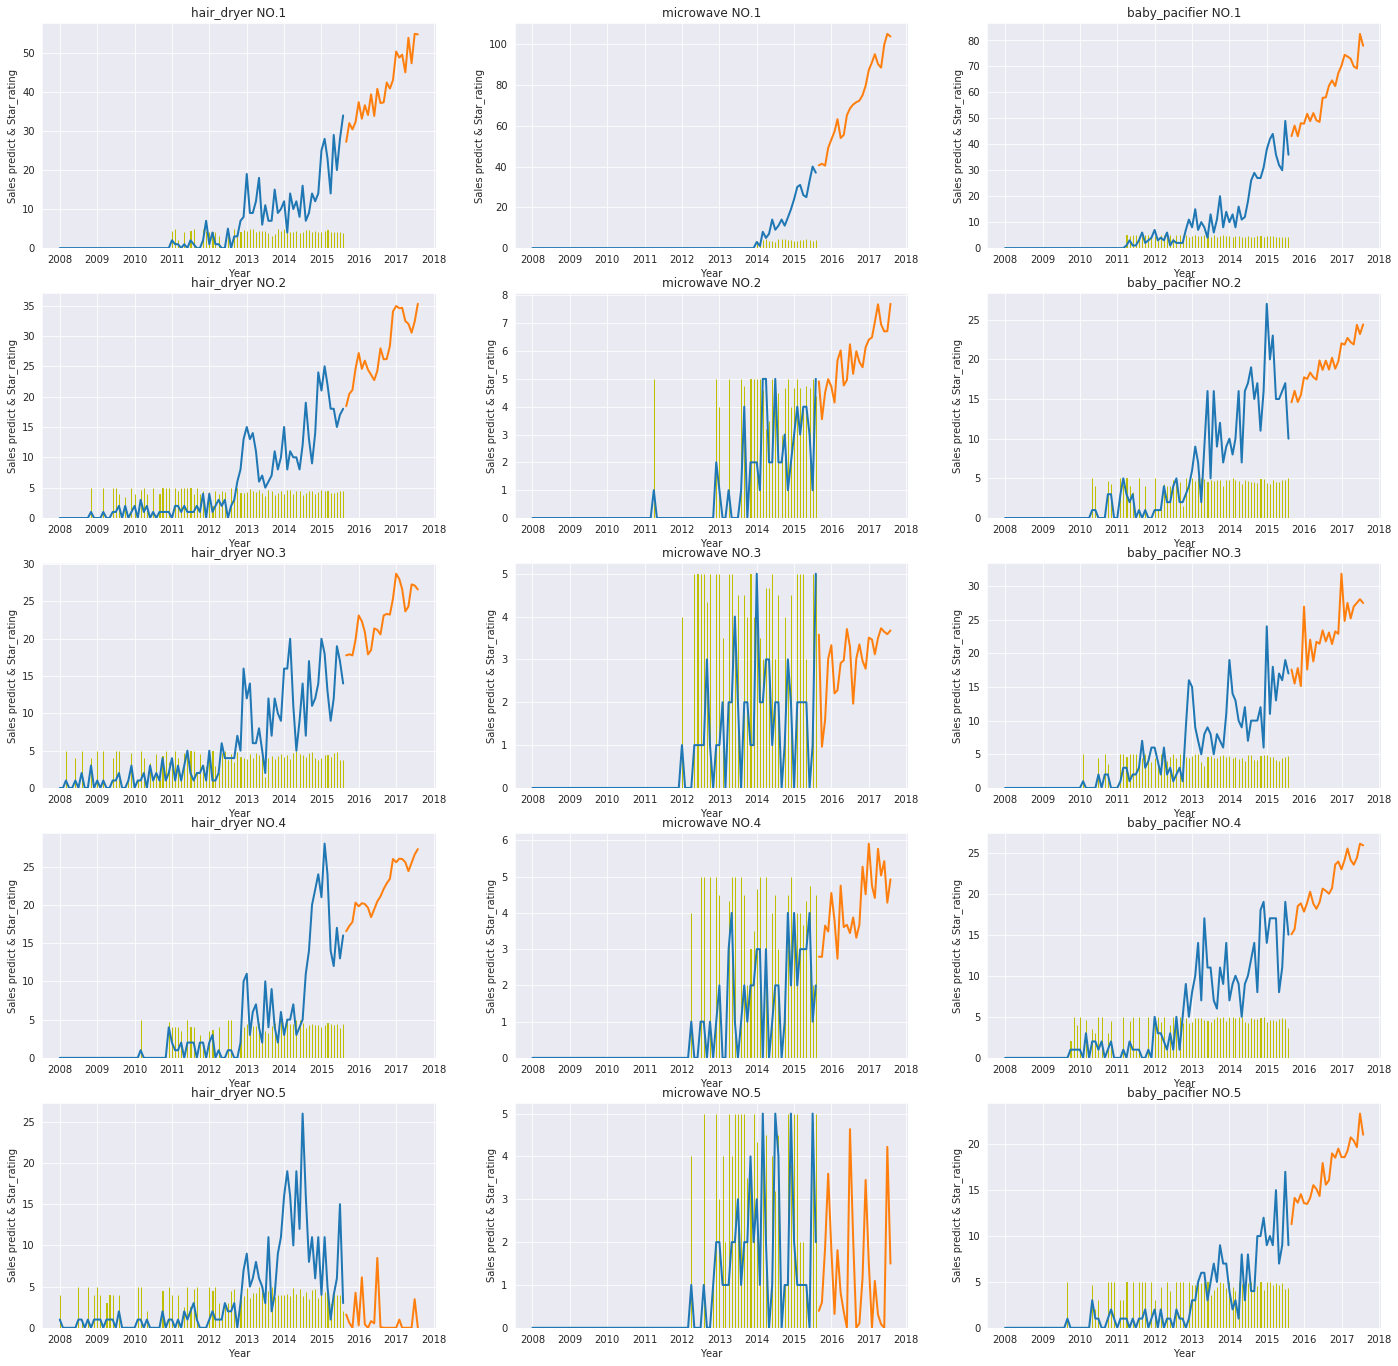

In [118]:
plt.figure(figsize=(24,24))
plt.subplot(5,3,7)
plt.plot(hair_11.index, hair_11['cnt'], lw=2)
plt.bar(hair_11.index, hair_11['ave_score'], edgecolor='y')
plt.plot(forecast_11.index, forecast_11['Prediction'], lw=2, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Sales predict & Star_rating')
plt.title('hair_dryer NO.3')

plt.subplot(5,3,10)
plt.plot(hair_88.index, hair_88['cnt'], lw=2)
plt.bar(hair_88.index, hair_88['ave_score'], edgecolor='y')
plt.plot(forecast_88.index, forecast_88['Prediction'], lw=2, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Sales predict & Star_rating')
plt.title('hair_dryer NO.4')

plt.subplot(5,3,13)
plt.plot(hair_244.index, hair_244['cnt'], lw=2)
plt.bar(hair_244.index, hair_244['ave_score'], edgecolor='y')
plt.plot(forecast_244.index, forecast_244['Prediction'], lw=2, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Sales predict & Star_rating')
plt.title('hair_dryer NO.5')

plt.subplot(5,3,1)
plt.plot(hair_258.index, hair_258['cnt'], lw=2)
plt.bar(hair_258.index, hair_258['ave_score'], edgecolor='y')
plt.plot(forecast_258.index, forecast_258['Prediction'], lw=2, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Sales predict & Star_rating')
plt.title('hair_dryer NO.1')

plt.subplot(5,3,4)
plt.plot(hair_269.index, hair_269['cnt'], lw=2)
plt.bar(hair_269.index, hair_269['ave_score'], edgecolor='y')
plt.plot(forecast_269.index, forecast_269['Prediction'], lw=2, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Sales predict & Star_rating')
plt.title('hair_dryer NO.2')

plt.subplot(5,3,14)
plt.plot(micro_0.index, micro_0['cnt'], lw=2)
plt.bar(micro_0.index, micro_0['ave_score'], edgecolor='y')
plt.plot(forecast_0.index, forecast_0['Prediction'], lw=2, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Sales predict & Star_rating')
plt.title('microwave NO.5')

plt.subplot(5,3,2)
plt.plot(micro_13.index, micro_13['cnt'], lw=2)
plt.bar(micro_13.index, micro_13['ave_score'], edgecolor='y')
plt.plot(forecast_13.index, forecast_13['Prediction'], lw=2, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Sales predict & Star_rating')
plt.title('microwave NO.1')

plt.subplot(5,3,5)
plt.plot(micro_19.index, micro_19['cnt'], lw=2)
plt.bar(micro_19.index, micro_19['ave_score'], edgecolor='y')
plt.plot(forecast_19.index, forecast_19['Prediction'], lw=2, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Sales predict & Star_rating')
plt.title('microwave NO.2')

plt.subplot(5,3,8)
plt.plot(micro_35.index, micro_35['cnt'], lw=2)
plt.bar(micro_35.index, micro_35['ave_score'], edgecolor='y')
plt.plot(forecast_35.index, forecast_35['Prediction'], lw=2, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Sales predict & Star_rating')
plt.title('microwave NO.3')

plt.subplot(5,3,11)
plt.plot(micro_40.index, micro_40['cnt'], lw=2)
plt.bar(micro_40.index, micro_40['ave_score'], edgecolor='y')
plt.plot(forecast_40.index, forecast_40['Prediction'], lw=2, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Sales predict & Star_rating')
plt.title('microwave NO.4')

plt.subplot(5,3,3)
plt.plot(baby_1131.index, baby_1131['cnt'], lw=2)
plt.bar(baby_1131.index, baby_1131['ave_score'], edgecolor='y')
plt.plot(forecast_1131.index, forecast_1131['Prediction'], lw=2, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Sales predict & Star_rating')
plt.title('baby_pacifier NO.1')

plt.subplot(5,3,6)
plt.plot(baby_1793.index, baby_1793['cnt'], lw=2)
plt.bar(baby_1793.index, baby_1793['ave_score'], edgecolor='y')
plt.plot(forecast_1793.index, forecast_1793['Prediction'], lw=2, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Sales predict & Star_rating')
plt.title('baby_pacifier NO.2')

plt.subplot(5,3,12)
plt.plot(baby_2067.index, baby_2067['cnt'], lw=2)
plt.bar(baby_2067.index, baby_2067['ave_score'], edgecolor='y')
plt.plot(forecast_2067.index, forecast_2067['Prediction'], lw=2, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Sales predict & Star_rating')
plt.title('baby_pacifier NO.4')

plt.subplot(5,3,9)
plt.plot(baby_2633.index, baby_2633['cnt'], lw=2)
plt.bar(baby_2633.index, baby_2633['ave_score'], edgecolor='y')
plt.plot(forecast_2633.index, forecast_2633['Prediction'], lw=2, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Sales predict & Star_rating')
plt.title('baby_pacifier NO.3')

plt.subplot(5,3,15)
plt.plot(baby_3725.index, baby_3725['cnt'], lw=2)
plt.bar(baby_3725.index, baby_3725['ave_score'], edgecolor='y')
plt.plot(forecast_3725.index, forecast_3725['Prediction'], lw=2, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Sales predict & Star_rating')
plt.title('baby_pacifier NO.5')

plt.savefig("Forecasting_ARIMA")